import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatemehmehrparvar/liver-disorders")

print("Path to dataset files:", path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer


#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =  pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [4]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Exploratory Data Analysis

In [6]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

# Data Preprocessing

In [10]:
df[df['A/G Ratio'].isnull()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [11]:
df['A/G Ratio'].mean()

0.9470639032815197

In [12]:
df['A/G Ratio'] = df['A/G Ratio'].fillna(df['A/G Ratio'].mean())

In [13]:
df[df['A/G Ratio'].isnull()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
df['Selector'].unique()

array([1, 2], dtype=int64)

In [16]:
X = df.drop(columns='Selector')
y = df['Selector']

In [17]:
X.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [18]:
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(include=['int','float64'])

In [19]:
X_cat['Gender'] = X_cat['Gender'].replace({'Male':1,'Female':0})

### Standard Scalar

In [21]:
std_scaler = StandardScaler()
data = pd.DataFrame(std_scaler.fit_transform(X_num),
                                   columns=std_scaler.get_feature_names_out(),
                                   index=df.index)

In [22]:
data.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [23]:
x_transformed = pd.concat([X_cat,data],axis=1)

In [24]:
x_transformed.head()

,Gender,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,1,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


## Feature Engineering

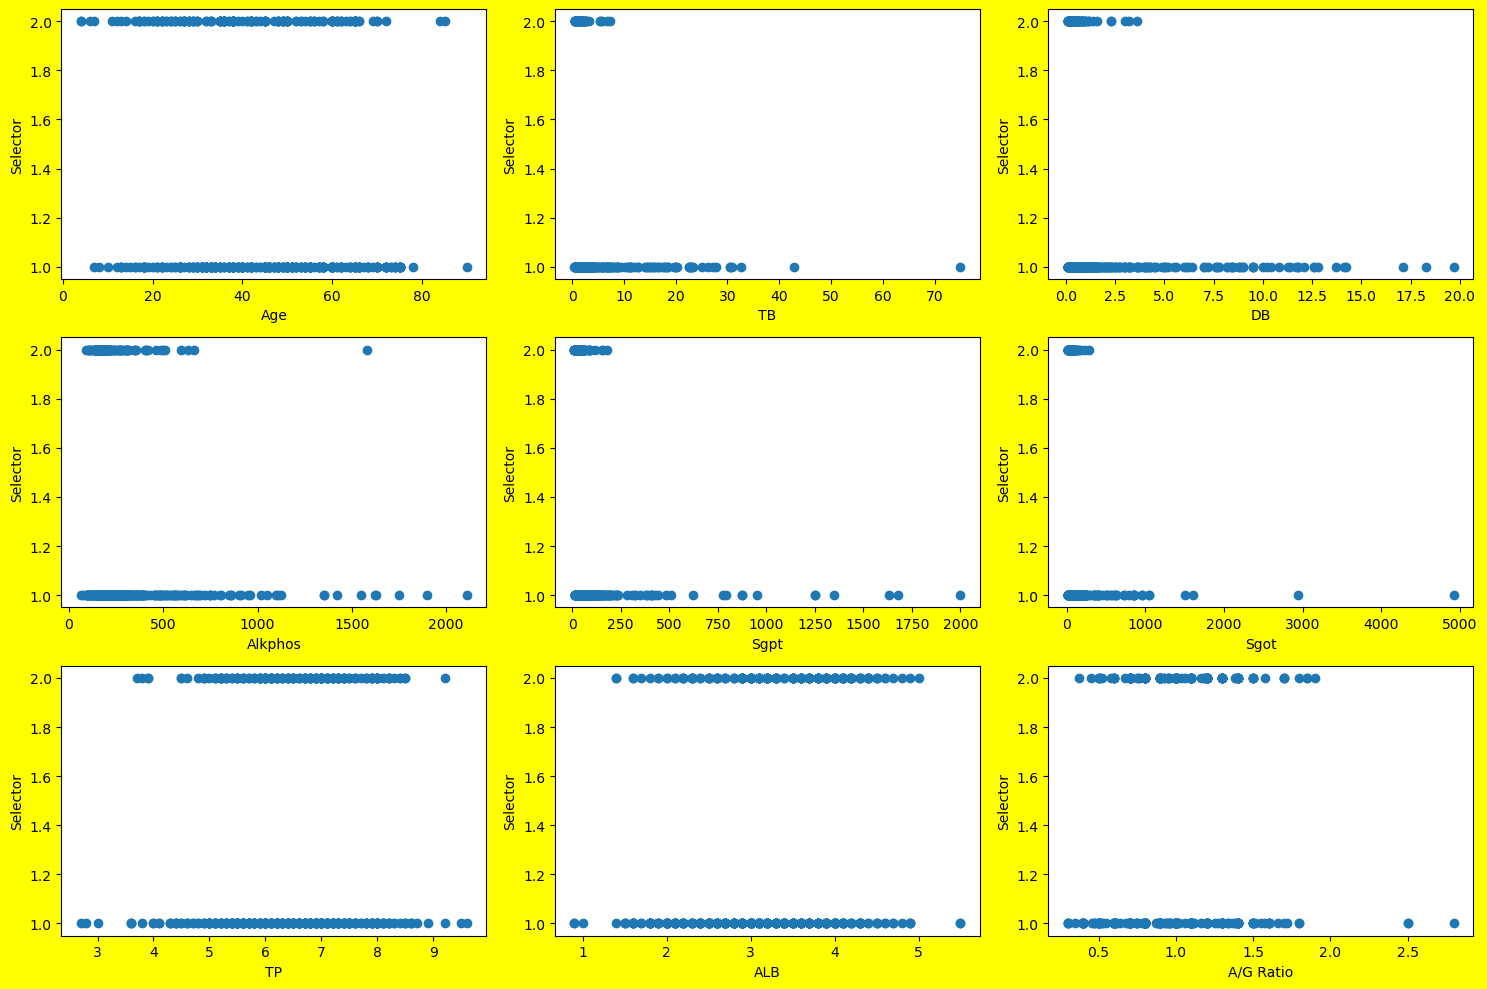

In [26]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=12 :
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(X[column],df['Selector'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Selector',fontsize=10)
    plotnumber+=1
plt.tight_layout()

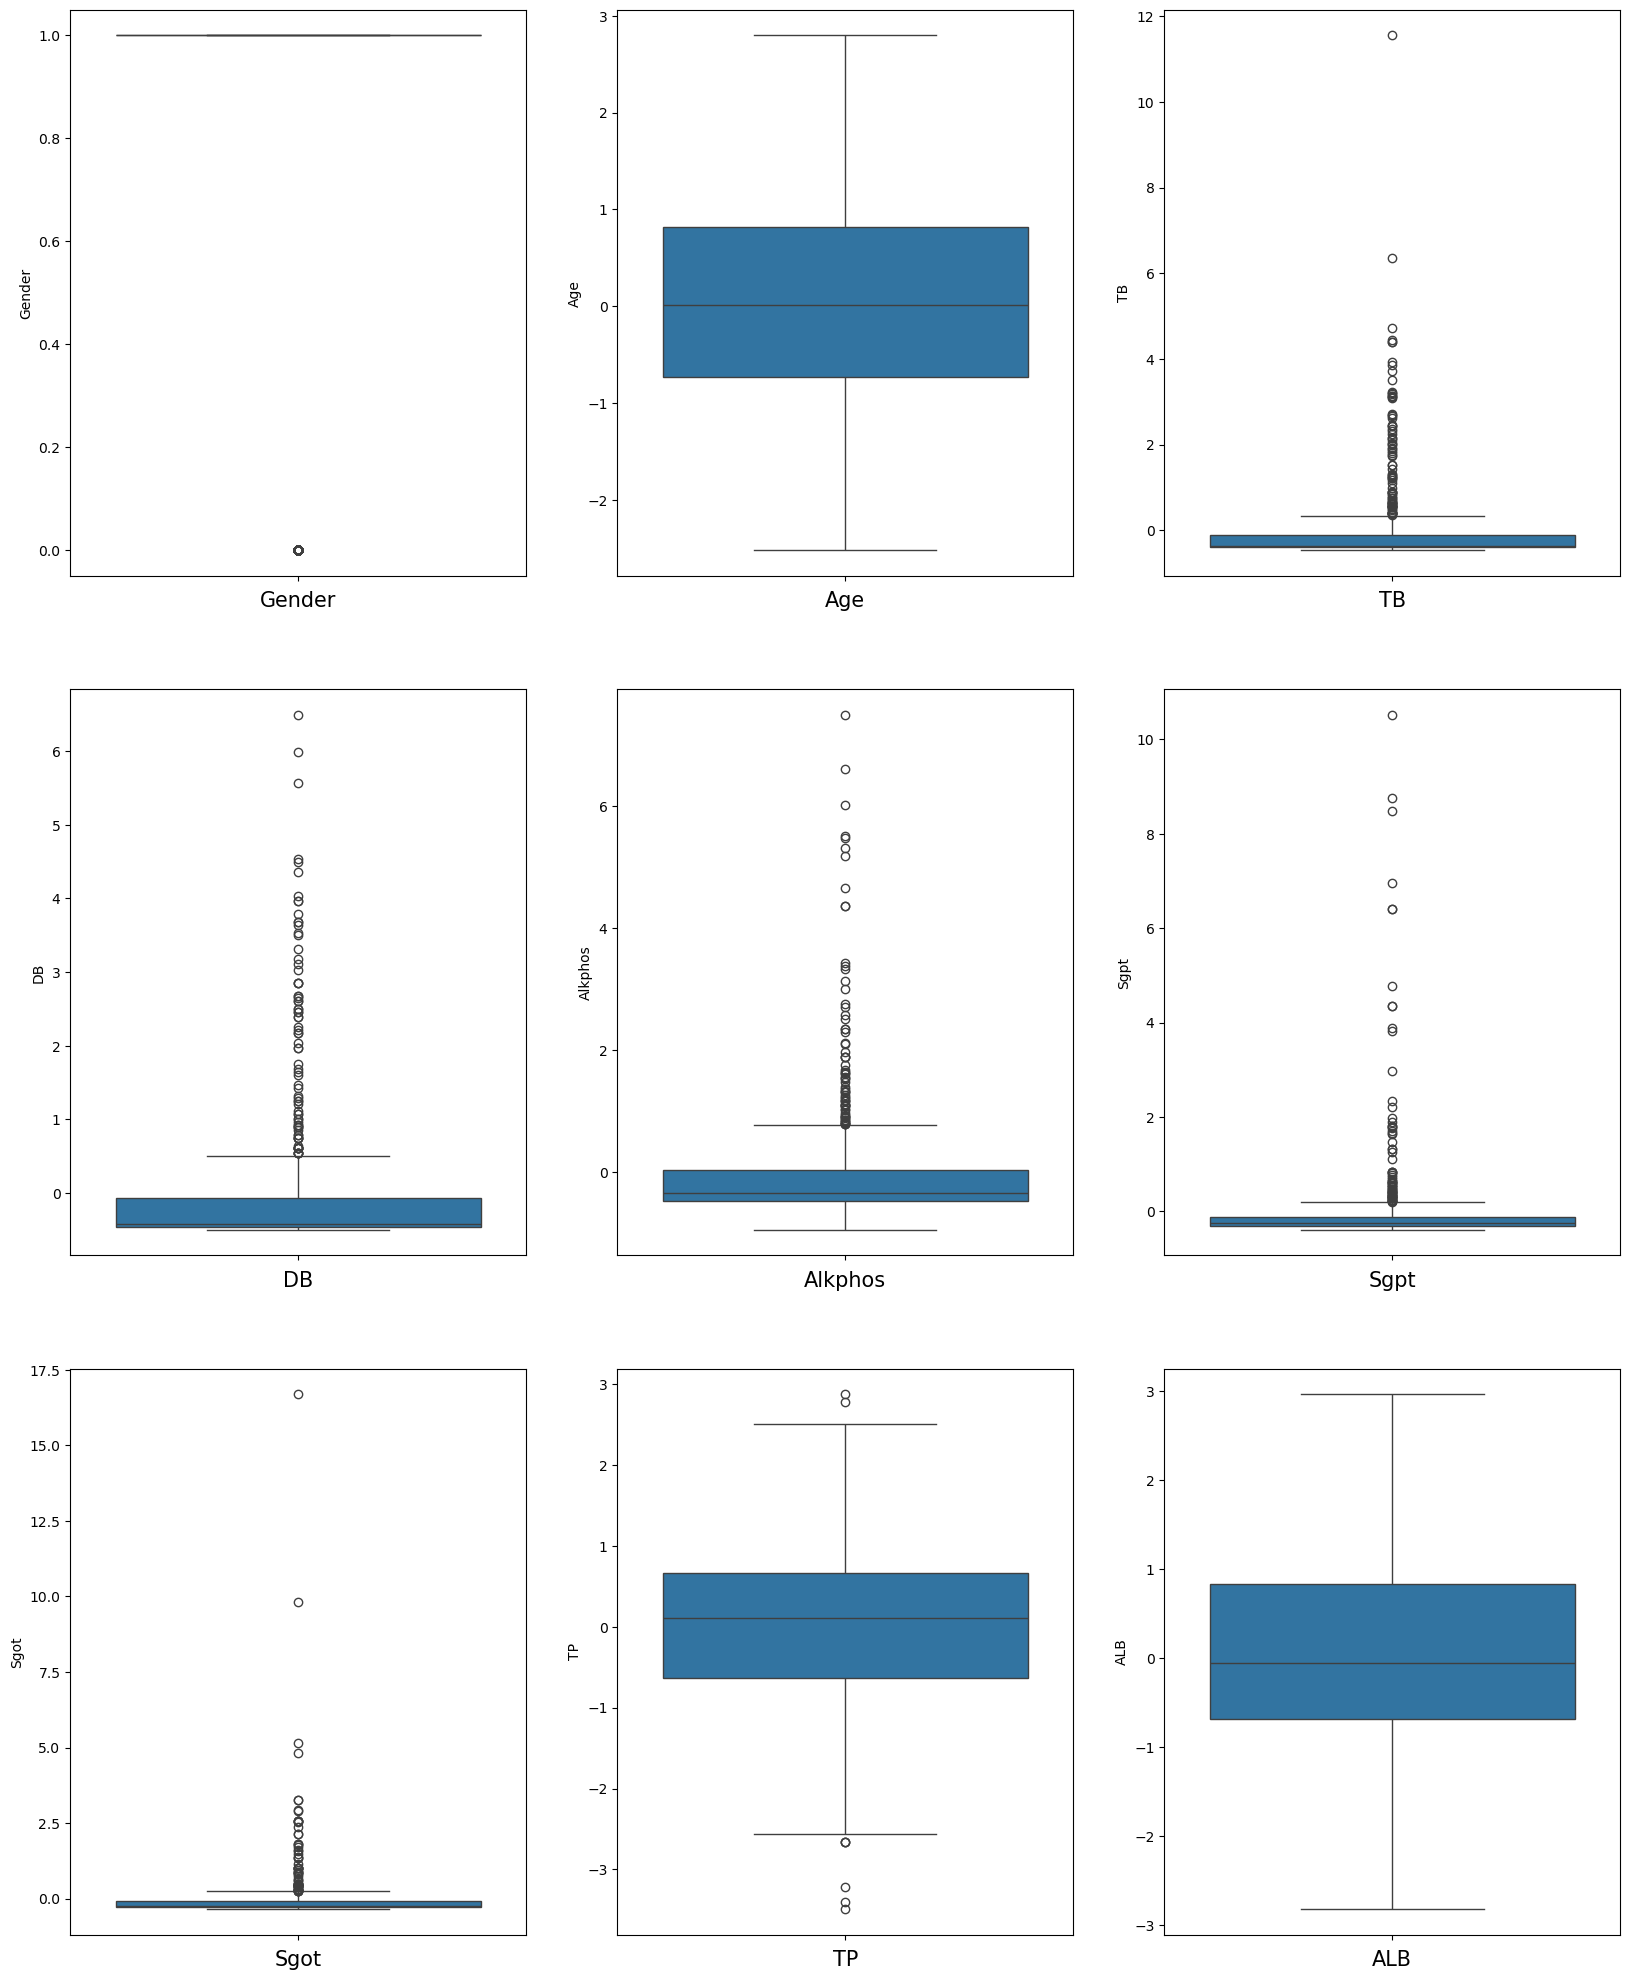

In [27]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in x_transformed:
    if graph<=9:    
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data= x_transformed[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1
plt.show()

In [28]:
df['Selector'].value_counts()

Selector
1    416
2    167
Name: count, dtype: int64

#### Correlation

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
vif["Features"] = data.columns

In [32]:
vif

,vif,Features
0,1.096603,Age
1,4.277109,TB
2,4.519497,DB
3,1.118060,Alkphos
4,2.817268,Sgpt
5,2.810527,Sgot
6,5.553642,TP
7,10.100792,ALB
8,3.670463,A/G Ratio


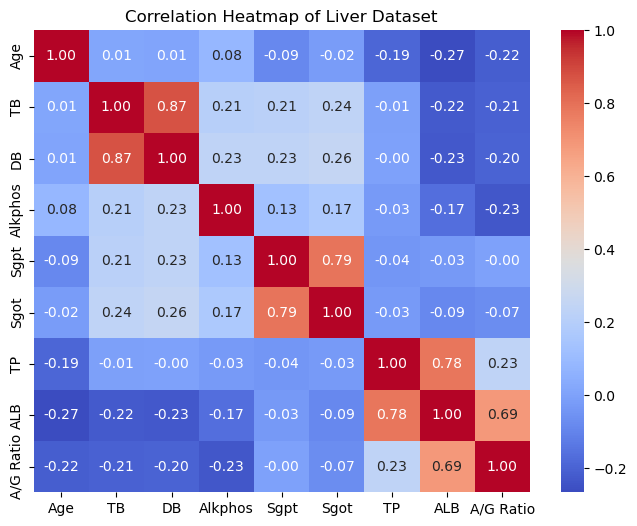

In [33]:
df_corr = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Liver Dataset")
plt.show()


In [34]:
from sklearn.feature_selection import SelectKBest,f_classif

In [35]:
best_features = SelectKBest(score_func=f_classif,k=7)
fit = best_features.fit(x_transformed,y)
df_scores1 = pd.DataFrame(fit.scores_)
df_pvalues1 = pd.DataFrame(fit.pvalues_)
df_columns1 = pd.DataFrame(x_transformed.columns)

# concatenate dataframes
feature_scores2 = pd.concat([df_columns1, df_scores1,df_pvalues1],axis=1)

feature_scores2.columns = ['Feature_Name','Score','P_values']  # name output columns
print(feature_scores2.nlargest(6,'Score'))

  Feature_Name      Score      P_values
3           DB  37.439592  1.734103e-09
2           TB  29.609282  7.801431e-08
4      Alkphos  20.558435  7.027487e-06
5         Sgpt  15.941220  7.371781e-05
9    A/G Ratio  15.722136  8.251144e-05
8          ALB  15.537431  9.074361e-05


### Here there is high correlation between TB and DB,SGPT AND SGOT, ALB and A/G Ratio

## Data Splitting


In [38]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.25, random_state=42)

### Knn Algorithm

In [40]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
knn.score(x_train,y_train)

0.7871853546910755

In [42]:
knn_pred = knn.predict(x_test)

In [43]:
accuracy_score(knn_pred,y_test)

0.636986301369863

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x_transformed, y,cv=5)

array([0.64102564, 0.69230769, 0.58974359, 0.59482759, 0.69827586])

In [45]:
cross_val_score(knn, x_transformed, y,cv=5).mean()

0.6432360742705571

#### Hyper Parameter Tuning - GridSearchCV

In [47]:
param_grid = { 'algorithm' : ['kd_tree', 'brute'],
               'leaf_size' : range(1,21),
               'n_neighbors' : range(1,21)
              }

In [48]:
grid_srch = GridSearchCV(param_grid=param_grid,estimator=knn)

In [49]:
grid_srch.fit(x_train,y_train)

  File "C:\Users\DELL\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(1, 21),
                         'n_neighbors': range(1, 21)})

In [50]:
grid_srch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, n_neighbors=20)

In [51]:
grid_srch.best_score_

0.6910135841170325

In [217]:
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, n_neighbors=20)

In [219]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, n_neighbors=20)

In [221]:
knn.score(x_train,y_train)

0.7070938215102975

In [223]:
knn_pred2 = knn.predict(x_train)

In [225]:
# Write one function and call as many as times to check accuracy_score of different models
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
      
        print("\n================Train Result==========================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n=================Test Result==========================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred,digits=2))## Model confidence/accuracy

In [227]:
# Call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False)  # This is for testing score


================Train Result==========================
Accuracy Score: 70.71%

=================Test Result==========================
Accuracy Score: 71.23%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.76      0.91      0.82       109
           2       0.33      0.14      0.19        37

    accuracy                           0.71       146
   macro avg       0.54      0.52      0.51       146
weighted avg       0.65      0.71      0.66       146



### Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [60]:
nb_pred1 = nb.predict(x_test)

In [61]:
nb.score(x_train,y_train)

0.5537757437070938

In [62]:
# Call the function and pass dataset to check train and test score
metric_score(nb,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(nb,x_train,x_test,y_train,y_test,train=False)  # This is for testing score


================Train Result==========================
Accuracy Score: 55.38%

=================Test Result==========================
Accuracy Score: 54.11%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.39      0.56       109
           2       0.36      1.00      0.52        37

    accuracy                           0.54       146
   macro avg       0.68      0.69      0.54       146
weighted avg       0.84      0.54      0.55       146



### Logistic Regerssion

In [64]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
lr_pred = lr.predict(x_test)

In [66]:
lr_pred

array([2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2], dtype=int64)

In [67]:
lr.score(x_train,y_train)

0.7139588100686499

In [68]:
# Call the function and pass dataset to check train and test score
metric_score(lr,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(lr,x_train,x_test,y_train,y_test,train=False)  # This is for testing score


================Train Result==========================
Accuracy Score: 71.40%

=================Test Result==========================
Accuracy Score: 71.92%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.77      0.88      0.82       109
           2       0.41      0.24      0.31        37

    accuracy                           0.72       146
   macro avg       0.59      0.56      0.56       146
weighted avg       0.68      0.72      0.69       146



##### Tuning

#### LassoCV

In [71]:
lasscv = LassoCV(cv=5, random_state=42)
lasscv.fit(x_train,y_train)

LassoCV(cv=5, random_state=42)

In [72]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.02092899247154911

In [73]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.02092899247154911)

In [74]:
lasso_reg.score(x_test, y_test)

0.09320822463786216

##### RidgeCV

In [76]:
np.arange(0.01,0.1,0.001)

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ])

In [77]:
ridgecv = RidgeCV(alphas=np.arange(0.01,0.1,0.001))
ridgecv.fit(x_train,y_train)                  

RidgeCV(alphas=array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]))

In [78]:
ridgecv.alpha_

0.09999999999999992

In [79]:
ridgmodel = Ridge(alpha=ridgecv.alpha_)
ridgmodel.fit(x_train,y_train)

Ridge(alpha=0.09999999999999992)

In [80]:
ridgmodel.score(x_test,y_test)

0.08491206289741493

In [81]:
# L1 regularized logistic regression
log_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)

# L2 regularized logistic regression
log_l2 = LogisticRegression(penalty='l2', solver='newton-cholesky', C=1.0)

# Elastic Net
log_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)

# Fit and evaluate
for model in [log_l1, log_l2, log_en]:
    model.fit(x_train, y_train)
    print(model.penalty, "Accuracy:", model.score(x_test, y_test))

l1 Accuracy: 0.7054794520547946
l2 Accuracy: 0.7191780821917808
elasticnet Accuracy: 0.7123287671232876


### Decicsion Tree

In [160]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [162]:
dc_prd = dc_tree.predict(x_test)

In [164]:
dc_tree.score(x_train,y_train)

1.0

In [166]:
# Call the function and pass dataset to check train and test score
metric_score(dc_tree,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(dc_tree,x_train,x_test,y_train,y_test,train=False)  # This is for testing score


================Train Result==========================
Accuracy Score: 100.00%

=================Test Result==========================
Accuracy Score: 70.55%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.84      0.75      0.79       109
           2       0.44      0.57      0.49        37

    accuracy                           0.71       146
   macro avg       0.64      0.66      0.64       146
weighted avg       0.74      0.71      0.72       146



In [172]:
grid_params = {
    'criterion' :['gini', 'entropy'],
    'max_depth' : range(3,12,2),
    'min_samples_leaf' : range(3,10,2),
    'min_samples_split': range(4,10,2)    
}

In [174]:
grd_srch = GridSearchCV(estimator=dc_tree,
                        param_grid=grid_params,
                        cv= 5)

In [176]:
grd_srch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [178]:
best_params = grd_srch.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 4}


In [180]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=7,min_samples_split=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7,
                       min_samples_split=4)

In [182]:
dt_prd = dt.predict(x_test)

In [184]:
# Call the function and pass dataset to check train and test score
metric_score(dt,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False)  # This is for testing score


================Train Result==========================
Accuracy Score: 73.46%

=================Test Result==========================
Accuracy Score: 73.29%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.82      0.83      0.82       109
           2       0.47      0.46      0.47        37

    accuracy                           0.73       146
   macro avg       0.65      0.64      0.64       146
weighted avg       0.73      0.73      0.73       146



### ROC AUC Curve

In [244]:
models1 = {
    'knn' : KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, n_neighbors=20),
    'NB':GaussianNB(),
    'Logistic Regression':LogisticRegression(penalty='l2', solver='newton-cholesky', C=1.0),
    'Decision Tree':DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=7,min_samples_split=4)
}

for name1,model1 in models1.items():
    model1.fit(x_train,y_train)


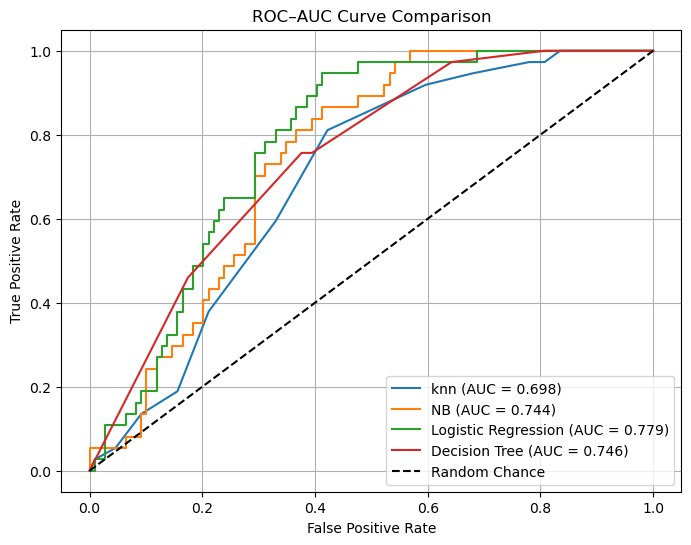

In [248]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
plt.figure(figsize=(8, 6))

for name1, model1 in models1.items():
    y_prob = model1.predict_proba(x_test)[:, 1]

    # Explicitly specify positive label since y_test has {1,2}
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=2)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name1} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC–AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



## Logistic Regression : Best among all — strong separability, consistent generalization.